In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import arepo
from tqdm import tqdm
import agama
from scipy.optimize import minimize
from scipy import stats

In [2]:
snap_path = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'
in_bar_path = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/in_bar/data/'

In [3]:
def read_snap(idx, name, lvl, parttype=[2, 3, 4], fields=['Coordinates', 'Masses']):
    sn = arepo.Snapshot(snap_path+name+'/'+lvl+'/output', idx, combineFiles=True, parttype=parttype,
                        fields=fields)
    return sn

In [4]:
def compute_Lz(sn):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    
    pos = sn.part1.pos.value - center
    vel = sn.part1.vel.value
    
    Lang = np.cross(pos, vel)
    
    return Lang[:,2]

In [5]:
def read_agama_pot(idx, name, lvl):
    base = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/gasbar/analysis/agama_pot/data/'
    fname = base + 'pot_' + name + '-' + lvl + '/pot_' + name + '-' + lvl + '.' + str(idx) + '.txt'
    return agama.Potential(fname)

def compute_vc(R, pot):
    acc = pot.force(R, 0, 0)
    vcsq = - R * acc[0]
    return np.sqrt(vcsq)

def _to_minimize(R, pot, omega_p):
    vc = compute_vc(R, pot)
    omega = vc / R
    return np.abs(omega - omega_p)

def compute_RCR(pot, omega_p, Rguess=6):
    ans = minimize(_to_minimize, Rguess, args=(pot, omega_p))

    return float(ans.x)

In [6]:
sn = read_snap(500, 'Nbody', 'lvl3', parttype=1, fields=None)
sn_1000 = read_snap(1000, 'Nbody', 'lvl3', parttype=1, fields=None)
snS = read_snap(300, 'phantom-vacuum-Sg20-Rc3.5', 'lvl3', parttype=1, fields=None)
snS_1000 = read_snap(1000, 'phantom-vacuum-Sg20-Rc3.5', 'lvl3', parttype=1, fields=None)

In [7]:
pot = read_agama_pot(500, 'Nbody', 'lvl3')
RCR = compute_RCR(pot, 40.0)

<ipython-input-5-1a3122245c23>:7: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  acc = pot.force(R, 0, 0)
<ipython-input-5-1a3122245c23>:7: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  acc = pot.force(R, 0, 0)


In [8]:
pot = read_agama_pot(300, 'phantom-vacuum-Sg20-Rc3.5', 'lvl3')
RCR = compute_RCR(pot, 40.0)

<ipython-input-5-1a3122245c23>:7: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  acc = pot.force(R, 0, 0)
<ipython-input-5-1a3122245c23>:7: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  acc = pot.force(R, 0, 0)


In [9]:
Lz = compute_Lz(sn)
LzS = compute_Lz(snS)

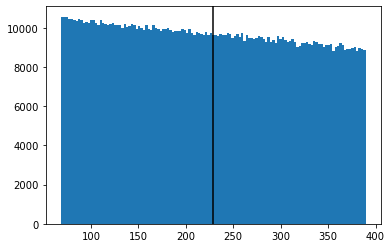

In [35]:
plt.hist(Lz, bins=np.linspace(0.3 * RCR * 40.0, 1.7 * RCR * 40.0, 128));
plt.axvline(RCR * 40.0, c='k')


# plt.yscale('log')

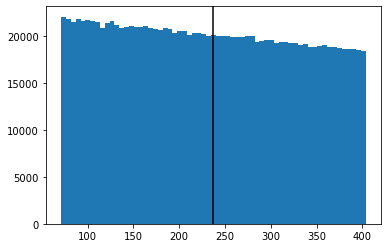

In [40]:
plt.hist(LzS, bins=np.linspace(0.3 * RCR * 40.0, 1.7 * RCR * 40.0, 64));
plt.axvline(RCR * 40.0, c='k')


# plt.yscale('log')

In [17]:
kernel = stats.gaussian_kde(LzS)
Lzlist = np.linspace(0.5*RCR*40.0, 1.5*RCR*40.0, 128)
pLz = kernel(Lzlist)


(0.0, 0.0002)

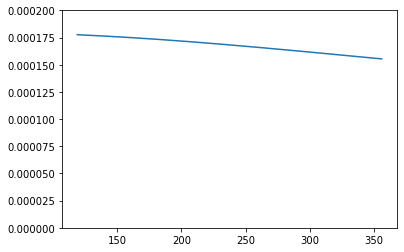

In [18]:
plt.plot(Lzlist, pLz)
plt.ylim(0, 0.0002)